In [3]:
import mysql.connector as sql
import pandas as pd

mydb = sql.connect (
    host = "localhost",
    user = "root",
    password = "ZAQs8271911c$",
    auth_plugin='mysql_native_password',
    buffered = True,          # using this for reading table, panda dont need it
    #multi=True,                 # if wanna use mulitple query
    database = "sql_intro"
)

# auth_plugin is needed, can check by commends 
# SELECT user,authentication_string,plugin,host FROM mysql.user;
# check the columns plugin and user


print(mydb)


## group by caluse is needed for having clasue

# Having in SQL
#### The having clause in SQL operates on grouped records and returns rows where aggregate(聚集體，集成體；總數，合計) function results matched with given conditions only
```
#Syntax
Select column_names
From table_name
Where condition
Group By column_names
Having condition
Order by column_names
```

# 「WHERE」と「HAVING」の違い
#### しかしここで一つの疑問点が生まれる人もいるでしょう。そう「WHERE」の存在です。

# 「WHERE」とは
#### 一度でも使ったことがある人はご存知だと思いますが、「WHERE」も「HAING」と同じく「抽出条件を指定」するコマンドでのです。つまり、先ほどの処理は「WHERE」で書いても全く同じ結果が返ってくるんです。

#  違いは呼ばれるタイミング!
##### 見出しにも書いてありますが、違いはズバリ呼ばれるタイミングです。以下の画像は、SELECT文を使用した時の、命令の呼ばれる順番です。



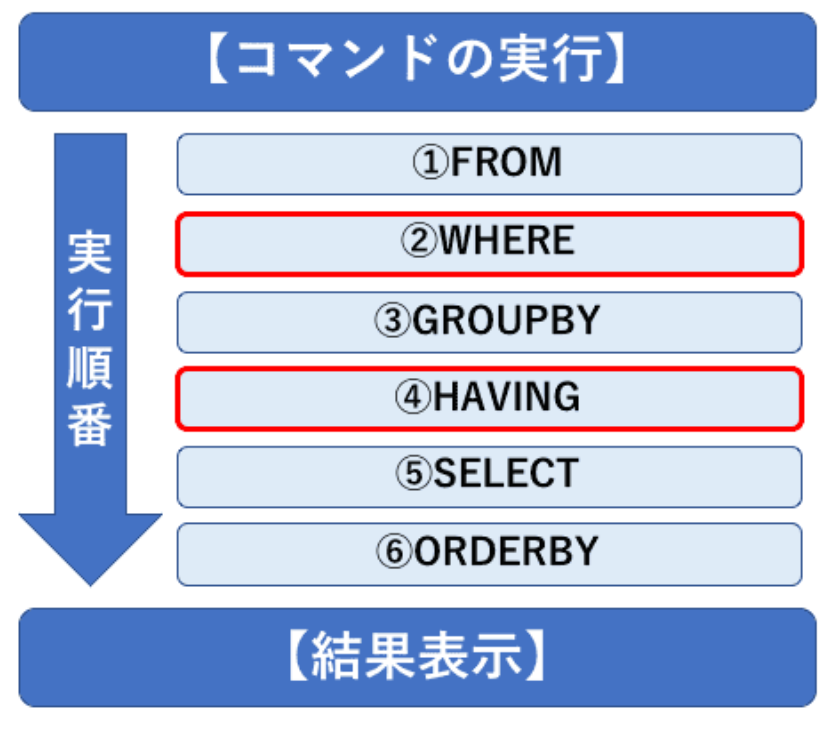

In [75]:
from IPython.display import Image
Image(filename="/home/bruce/Pictures/Screenshots/sql - having vs where.png")

#### 今回の主役である「WHERE」と「HAVING」は画像の通り「WHERE」→「GROUP BY」→「HAVING」の順に呼ばれるわけです。つまり間にある「GROUP BY」が関わってこなければ、全く同じ挙動をしますが、
#### 「GROUP BY」を使って、グループ化を行った際には、以下の違いが出てくるわけです。

> WHERE・・・グループ化をされる前の段階、つまり元々のデータでの抽出条件を指定できる

> HAVING・・・グループ化した後の情報での、抽出条件を指定できる。
#### この辺りの違いは「GROUP BY」を実際に行った例で理解が出来ると思います。「GROUP BY」の記事に詳細を載せていますので、実例を見て理解を深めてみてください。

In [76]:
sql_query = """
SELECT *
FROM employees
"""
pd_content = pd.read_sql_query(
    sql_query,
    mydb
)

pd_content.head()

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Emp_name,Emp_ID,Age,Gender,Doj,Dept,City,Salary
0,Matthew,10000,30,M,2000-10-17,Marketing,Chicago,40000.0
1,Betty,10001,39,M,2000-08-06,PR,Los Angeles,100000.0
2,Nancy,10002,43,M,2000-03-04,PR,Chicago,50000.0
3,Daniel,10003,19,M,2000-09-19,Finance,San Antonio,70000.0
4,Lisa,10004,42,F,2000-03-17,IT,Phoenix,60000.0


In [77]:
# find the cities where there are more than 2 employees
sql_query = """
SELECT count(emp_id) , city
FROM employees
GROUP BY city
HAVING count(emp_id) > 2;
"""

pd_content = pd.read_sql_query(
    sql_query,
    mydb
)


#!  WHERE・・・グループ化をされる前の段階、つまり元々のデータでの抽出条件を指定できる

#!  HAVING・・・グループ化した後の情報での、抽出条件を指定できる。
pd_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count(emp_id),city
0,6,Chicago
1,3,Phoenix
2,4,Houston
3,3,San Jose


In [78]:
# fing out number of male employees in all cities
sql_query = """
SELECT count(emp_id) , city
FROM employees
WHERE gender = "M"
GROUP BY city 
ORDER BY count(emp_id)
DESC;
"""

pd_content = pd.read_sql_query(
    sql_query,
    mydb
)

pd_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count(emp_id),city
0,5,Chicago
1,2,San Antonio
2,2,San Jose
3,2,Philadelphia
4,2,San Diego
5,1,Los Angeles
6,1,Phoenix
7,1,Houston
8,1,Dallas


In [79]:

#! using where to filter gender male before group by
#! using HAVING to filter out aggregated records
sql_query = """
SELECT count(emp_id), city
FROM employees
WHERE gender = "M"
GROUP BY city
HAVING count(emp_id) > 2
ORDER BY count(emp_id)
DESC;
"""
pd_content = pd.read_sql_query(
    sql_query,
    mydb
)
pd_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count(emp_id),city
0,5,Chicago


#### another example
######  find the total salary of each dept and see which one is equals to 250000 or more

In [80]:
#	Emp_name	Emp_ID	Age	Gender	Doj	                 Dept	          City	        Salary
#0	Matthew 	10000	    30	    M	       2000-10-17	Marketing	Chicago	40000.0
sql_query = """
SELECT dept, sum(salary) as total
FROM employees
GROUP BY dept
HAVING total >= 250000;
"""
pd_content = pd.read_sql_query(
    sql_query,
    mydb
)
pd_content.head

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<bound method NDFrame.head of              dept     total
0              PR  250000.0
1         Finance  360000.0
2              IT  330000.0
3  Human Resource  270000.0>

In [81]:
## lets find out dept has more than 5 employees

sql_query = """
SELECT dept, count(emp_id) AS no_employees
FROM employees
GROUP BY dept
HAVING no_employees > 5;
"""
pd_content = pd.read_sql_query(
    sql_query,
    mydb
)

pd_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,dept,no_employees
0,Finance,6


In [87]:

## lets find out dept has more than 3 employees
#!  using count(*)
#! COUNT(*) returns the number of rows in a specified table, 
#! and it preserves duplicate rows. It counts each row separately. 
#! This includes rows that contain null values.

sql_query = """
SELECT dept, count(*) AS no_employees
FROM employees
GROUP BY dept
HAVING no_employees > 3;
"""
pd_content = pd.read_sql_query(
    sql_query,
    mydb
)

pd_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,dept,no_employees
0,Marketing,4
1,PR,4
2,Finance,6
3,IT,5
4,Human Resource,4


In [92]:

## lets find out dept has more than 3 employees
#! but excluding PR and Marketing depts


sql_query = """
SELECT dept, count(*) AS no_employees
FROM employees
WHERE dept != "pr" 
AND
dept != "marketing"
GROUP BY dept
HAVING no_employees > 3;
"""
pd_content = pd.read_sql_query(
    sql_query,
    mydb
)

pd_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,dept,no_employees
0,Finance,6
1,IT,5
2,Human Resource,4


In [93]:

#! marketing dept avg salary is 55000
sql_query = """
SELECT dept, avg(salary)
FROM employees
GROUP BY dept
"""
pd_content = pd.read_sql_query(
    sql_query,
    mydb
)

pd_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,dept,avg(salary)
0,Marketing,55000.000000
1,PR,62500.000000
2,Finance,60000.000000
3,IT,66000.000000
4,Operations management,73333.333333
5,Human Resource,67500.000000


In [94]:

#! marketing got 4 employees
sql_query = """
SELECT count(*), dept
FROM employees
GROUP BY dept
"""
pd_content = pd.read_sql_query(
    sql_query,
    mydb
)

pd_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count(*),dept
0,4,Marketing
1,4,PR
2,6,Finance
3,5,IT
4,3,Operations management
5,4,Human Resource


In [97]:
# avg salary of marketing dept 55000
# show all ppl of marketing dept

sql_query = """
SELECT *
FROM employees
WHERE 
dept = "marketing"
"""
pd_content = pd.read_sql_query(
    sql_query,
    mydb
)

pd_content

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Emp_name,Emp_ID,Age,Gender,Doj,Dept,City,Salary
0,Matthew,10000,30,M,2000-10-17,Marketing,Chicago,40000.0
1,William,10014,40,M,2002-08-30,Marketing,San Jose,60000.0
2,Michael,10019,34,M,2000-03-17,Marketing,Dallas,80000.0
3,Robert,10023,67,M,2000-01-01,Marketing,San Antonio,40000.0


# another way of using having

In [4]:

#! its from youtube but i cant get this working
# Group By And Having Clause In SQL | Group By Clause In SQL | SQL Tutorial For Beginners |Simplilearn
## https://www.youtube.com/watch?v=jk6_L0k8VPg&list=PLEiEAq2VkUUKL3yPbn8yWnatjUg0P0I-Z&index=6


#! find out number of pp in Marketing dept whose salary is lower than average salary (55000)
# from the result above, we do know there are 2 ppl have salary lower than average


sql_query = """
SELECT dept, count(*) as emp_count
FROM employees
group by dept
HAVING avg(salary) < 55000;
"""
pd_content = pd.read_sql_query(
    sql_query,
    mydb
)

pd_content

,dept,emp_count


In [6]:
sql_query = """
select *
from employees;
"""
pd_content = pd.read_sql_query(
    sql_query,
    mydb
)

pd_content

,Emp_name,Emp_ID,Age,Gender,Doj,Dept,City,Salary
0,Matthew,10000,30,M,2000-10-17,Marketing,Chicago,40000.0
1,Betty,10001,39,M,2000-08-06,PR,Los Angeles,100000.0
2,Nancy,10002,43,M,2000-03-04,PR,Chicago,50000.0
3,Daniel,10003,19,M,2000-09-19,Finance,San Antonio,70000.0
4,Lisa,10004,42,F,2000-03-17,IT,Phoenix,60000.0
5,Christopher,10005,55,M,2000-12-22,Operations management,Chicago,70000.0
6,Karen,10006,41,F,2000-07-22,Finance,Houston,70000.0
7,Charles,10007,40,F,2000-09-14,IT,Houston,30000.0
8,Sarah,10008,66,M,2000-04-01,Finance,Phoenix,30000.0
9,Thomas,10009,29,F,2000-11-04,Operations management,Phoenix,90000.0
